# Week 6 Assignment : Model Evaluation and Hyperparameter Tuning

## Importing the Required Libraries

In [79]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import uniform, randint

## Loading the dataset

In [82]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
df = pd.DataFrame(X)
df['target'] = y

In [84]:
df.head()

0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

In [86]:
df.describe()

0            1            2            3            4  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                 5            6            7            8            9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

                55           56           57           58           59  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.206455     0.000556     0.279354     5.557596    12.089037   
std       0.984401     0.023590     0.934302     5.103019     4.374694   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000    11.000000   
50%       0.000000     0.000000     0.000000     4.000000    13.000000   
75%       0.000000     0.000000     0.000000    10.000000    16.000000   
max      13.000000     1.000000     9.000000    16.000000    16.000000   

                60           61           62           63       target  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     11.809126     6.764051     2.067891     0.364496     4.490818  
std       4.933947     5.900623     4.090548     1.860122     2.865304  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      10.000000     0.000000     0.000000     0.000000     2.000000  
50%      14.000000     6.000000     0.000000     0.000000     4.000000  
75%      16.000000    12.000000     2.000000     0.000000     7.000000  
max      16.000000    16.000000    16.000000    16.000000     9.000000  

[8 rows x 65 columns]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [90]:
df.shape
df.isnull().sum().sum()  # checking for missing values if any
df.duplicated().sum()  # checking for duplicate values if any

0

## Data preprocessing: handle missing values, duplicates

In [93]:
df.drop_duplicates(inplace=True)
X = df.drop('target', axis=1)
y = df['target']

In [95]:
## Scaling the data by standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


## Splitting dataset into training and testing datasets

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## For baseline SVC Model

In [101]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(f"\n✅ Baseline SVC Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.2f}")


✅ Baseline SVC Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [103]:
## Now using Hyperparameter Tuning - GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=1)  ## k=5 in cross-validation
grid_search.fit(X_train, y_train)

best_model_grid = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred_grid = best_model_grid.predict(X_test)

print(f"\n Best Params from GridSearch: {best_params}")
print(f"Accuracy after GridSearch: {accuracy_score(y_test, y_pred_grid):.2f}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits

 Best Params from GridSearch: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy after GridSearch: 0.99


In [105]:
## Now using Hyperparameter Tuning - RandomizedSearchCV

param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 10))
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=20, cv=5, random_state=42, verbose=1)
random_search.fit(X_train, y_train)

best_model_rcv = random_search.best_estimator_
best_params_rcv = grid_search.best_params_
y_pred_rcv = best_model_rcv.predict(X_test)

print(f"\n Best Params from RandomizedSearch: {best_params_rcv}")
print(f"Accuracy after RandomizedSearch: {accuracy_score(y_test, y_pred_rcv):.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best Params from RandomizedSearch: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy after RandomizedSearch: 0.99


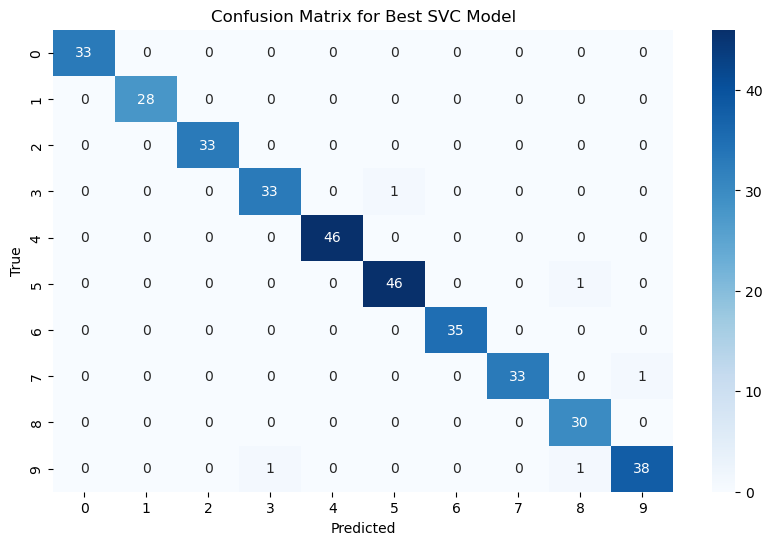

In [107]:
# Data Visualization of best svc model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rcv), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Best SVC Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## now for other models
## For RandomForestClassifier

In [110]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f"\n Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.2f}")


 Random Forest Classifier Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


In [112]:
## Now using Hyperparameter Tuning - GridSearchCV for RandomForest Classifier

param_grid_rfc = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rfc, cv=5)
grid_rfc.fit(X_train, y_train)

best_rfc = grid_rfc.best_estimator_
y_pred_rfc_grid = best_rfc.predict(X_test)
print("\nBest Random Forest (GridSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rfc_grid):.2f}")
print(f"Best Params: {grid_rfc.best_params_}")



Best Random Forest (GridSearchCV):
Accuracy: 0.98
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


In [114]:
# Randomized Search for Random Forest
param_dist_rfc = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11)
}
random_rfc = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rfc, n_iter=20, cv=5, random_state=42)
random_rfc.fit(X_train, y_train)

best_rfc_rand = random_rfc.best_estimator_
y_pred_rfc_rand = best_rfc_rand.predict(X_test)
print("\nBest Random Forest (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rfc_rand):.2f}")
print(f"Best Params: {random_rfc.best_params_}")


Best Random Forest (RandomizedSearchCV):
Accuracy: 0.98
Best Params: {'max_depth': 30, 'min_samples_split': 3, 'n_estimators': 153}


## For Decision Tree Classifier

In [117]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='macro'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='macro'):.2f}")

Baseline Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1-Score: 0.84


In [119]:
## Now using Hyperparameter Tuning - GridSearchCV for DecisionTree Classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_dt_grid = best_dt.predict(X_test)
print("\nBest Decision Tree (GridSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_grid):.2f}")
print(f"Best Params: {grid_dt.best_params_}")


Best Decision Tree (GridSearchCV):
Accuracy: 0.89
Best Params: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}


In [121]:
# Randomized Search for DecisionTree Classifier
param_dist_dt = {
    'max_depth': [None, 10],
        'min_samples_split': randint(2, 6)
    }

random_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist_dt, cv=5)
random_dt.fit(X_train, y_train)

best_Random_dt = random_dt.best_estimator_
y_pred_dt_random = best_Random_dt.predict(X_test)
print("\nBest Decision Tree (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_random):.2f}")
print(f"Best Params: {random_dt.best_params_}")


Best Decision Tree (RandomizedSearchCV):
Accuracy: 0.84
Best Params: {'max_depth': None, 'min_samples_split': 2}


## Conclusion

In [ ]:
#### SVC is best model after hyperparameter tuning as it gained max accuracy across all models tested 